<a href="https://colab.research.google.com/github/M-aurine/employee_database/blob/main/python%20essentials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# URL of the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
# Column names
column_names = ['mpg', 'cyl', 'disp', 'hp', 'weight', 'acc', 'year', 'origin']

df = pd.read_csv(
    url,
    names=column_names,
    na_values='?',       # replace '?' with NaN
    comment='\t',        # ignore car names
    sep=' ',             # space-separated columns
    skipinitialspace=True
)



## Inspecting the dataframe

In [ ]:
df.head(5)

,mpg,cyl,disp,hp,weight,acc,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


### Returning only values from one column

In [ ]:
df['mpg']

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


A **Pandas series** works as a wrapper around the underlying Numpy array that contains its data, which you can retrieve using the values attribute:

In [ ]:
df['mpg'].values[:5]

array([18., 15., 18., 16., 17.])

## Rows by index:

In [ ]:
df.iloc[:5]         # first 5 rows


,mpg,cyl,disp,hp,weight,acc,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## Rows by condition:

In [ ]:
df[df['year'] == 70]   # all cars from model year 1970


,mpg,cyl,disp,hp,weight,acc,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1


## Train-Validation-Test Split: Shuffling  
Taking the example of the year column, **we'd like to have cars from 1970 to 1982 in all three sets.** The easiest and fastest way to accomplish that is to simply shuffle the data first.  
We can use the **sample()** method of a Pandas dataframe to sample, that is, to draw data points from the dataframe in random order.  
The trick here is to draw the whole dataset using sample **(frac=1)**, so we got our full dataframe back, but in a different order.  
The resulting dataframe still has its original index values, but we can easily drop it using the **reset_index() method.**

In [ ]:
# Shuffle the entire dataframe randomly
# frac=1 means we take 100% of the rows
# random_state=1 ensures the shuffle is reproducible (same order every time)
# reset_index(drop=True) resets the row index from 0 and drops the old index
shuffled = df.sample(frac=1, random_state=1).reset_index(drop=True)

To actually perform the split, we'll use Scikit-Learn's **train_test_split**() twice, once for splitting the data into train and test sets, and then to subdivide the training data into train and validation sets.

In [ ]:
from sklearn.model_selection import train_test_split
trainval, test = train_test_split(shuffled, test_size=0.16, shuffle=False)
train, val = train_test_split(trainval, test_size=0.2, shuffle=False)

# Cleaning Data  
- The most basic checks you can do are looking for **missing values** and **outliers** in your data.  
- **Outliers** are values that are, literally, **"off the charts"**: they may be produced by a measurement or input (e.g. typing) errors, in which case they are not real and thus must be handled.  
The process of "fixing" missing values is called **imputation**8, that is, replacing the missing data with substituted values.  
- There are many techniques to accomplish this, from using the **mean** or **median** of the corresponding column in the training data, to more sophisticated approaches using other Machine Learning algorithms to **"predict"** the missing value.  
- Alternatively, if you can afford to lose some data points, it's also possible to **simply discard any data points containing missing values**.

In [ ]:
#Checking our data for missing values
is_missing_attr = train.isna()
n_missing_attr = is_missing_attr.sum(axis=1)
train[n_missing_attr > 0]

#Check which values are missing → isna().
#Count how many missing values per row → sum(axis=1).
#Filter rows that have any missing value → n_missing_attr > 0.

,mpg,cyl,disp,hp,weight,acc,year,origin
89,34.5,4,100.0,NaN,2320.0,15.8,81,2
208,25.0,4,98.0,NaN,2046.0,19.0,71,1
211,40.9,4,85.0,NaN,1835.0,17.3,80,2


In [ ]:
#Dropping any rows containing missing values
train.dropna(inplace=True)
train

,mpg,cyl,disp,hp,weight,acc,year,origin
0,18.0,6,171.0,97.0,2984.0,14.5,75,1
1,28.1,4,141.0,80.0,3230.0,20.4,81,2
2,19.4,8,318.0,140.0,3735.0,13.2,78,1
3,20.3,5,131.0,103.0,2830.0,15.9,78,2
4,20.2,6,232.0,90.0,3265.0,18.2,79,1
...,...,...,...,...,...,...,...,...
262,26.0,4,91.0,70.0,1955.0,20.5,71,1
263,26.4,4,140.0,88.0,2870.0,18.1,80,1
264,31.9,4,89.0,71.0,1925.0,14.0,79,2
265,19.2,8,267.0,125.0,3605.0,15.0,79,1


In [ ]:
#The same for the Validation and test sets
val.dropna(inplace=True)
test.dropna(inplace=True)

# Continuous Attributes  
- You can see that **mpg, displacement, horsepower, weight,** and **acceleration** are continuous attributes, that is, they may be any numeric value.  
- Let's see how the attributes (other than **fuel consumption, mpg**, which is the **target of our prediction**) fare in their own ranges of values:

array([[<Axes: title={'center': 'disp'}>, <Axes: title={'center': 'hp'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acc'}>]], dtype=object)

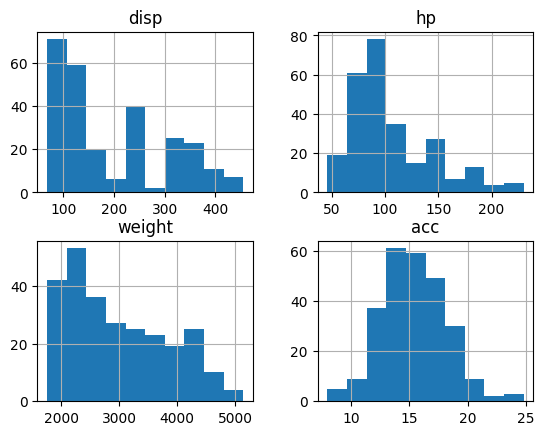

In [ ]:
cont_attr = ['mpg', 'disp', 'hp', 'weight', 'acc']
train_features = train[cont_attr[1:]]
train_features.hist()

- It doesn't look very good: not only are the ranges quite different from one another, but the ranges are nowhere near zero-centered, as expected from real-world physical attributes such as weight.  
-  It suffices to know for now that **deep learning models are more easily trained if the attributes or features used to train them display values in symmetrical ranges, preferably in low values, such as from minus three to three**.  
- Otherwise, they may exhibit problematic behaviors during training, failing to converge to a solution.  
- Therefore, it is best practice to bring all values to a more "digestible" range for the sake of the model's health. The procedure that accomplishes this is called **standardization** or, sometimes, **normalization**.  
- It consists of subtracting the mean (thus zero-centering) of the attribute, and dividing the result by the standard deviation (thus turning it into unit standard deviation).

In [ ]:
# Let's start by computing both means and standard deviations:
train_means = train_features.mean()  #train_features is your training dataset without the target
train_standard_deviations = train_features.std()
train_means, train_standard_deviations

(disp       195.456439
 hp         105.087121
 weight    2984.075758
 acc         15.432955
 dtype: float64,
 disp      106.255830
 hp         39.017837
 weight    869.802063
 acc         2.743941
 dtype: float64)

In [ ]:
# Let's standardize our features
train_standardized_features = (train_features - train_means)/train_standard_deviations
train_standardized_features.mean(), train_standardized_features.std()

(disp     -1.059758e-16
 hp       -1.648513e-16
 weight    7.569702e-17
 acc       4.003532e-16
 dtype: float64,
 disp      1.0
 hp        1.0
 weight    1.0
 acc       1.0
 dtype: float64)

Their **means are zero**, and their **standard deviations are one**, so it looks good. Let's visualize them:

array([[<Axes: title={'center': 'disp'}>, <Axes: title={'center': 'hp'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acc'}>]], dtype=object)

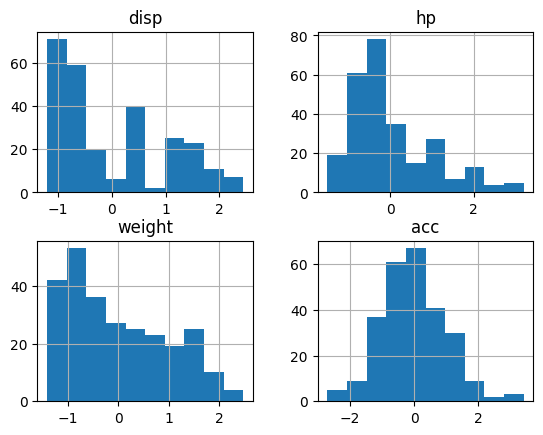

In [ ]:
train_standardized_features.hist()

- **Standardization doesn't change the shape of the distribution**, it only brings all the features to a similar footing when it comes to their ranges.  
- Even though we've standardized our continuous features manually, we don't have to do it like that. Scikit-Learn offers a **StandardScaler class** that can do this for us and, as we'll see later, we can also use PyTorch's own transformations to standardize values, even if they are pixel values on images!
- We used the training set to define the standardization parameters, namely, the means and standard deviations of our features. Now, we need to standardize the validation and training sets using those same parameters.  
- **Never** use the validation and test sets to compute parameters for standardization, or for any other preprocessing step!

In [ ]:
val_features = val[cont_attr[1:]] #cont_attr[1:] → a list of continuous feature column names, skipping the first one (probably the target column like mpg).
#val[cont_attr[1:]] → selects only the continuous features from the validation set.
#val_features now contains only the feature columns we want to standardize.
val_standardized_features = (val_features - train_means)/train_standard_deviations
val_standardized_features.mean(), val_standardized_features.std()

(disp     -0.089282
 hp       -0.151349
 weight   -0.121501
 acc       0.139288
 dtype: float64,
 disp      0.946465
 hp        0.917051
 weight    0.918898
 acc       0.958077
 dtype: float64)

- Notice that the resulting means and standard deviations **aren't quite zero and one**, respectively. That's expected since the validation set should have a similar, yet not quite exactly the same, distribution as the training set.  
- If you ever get perfect zero mean and unit standard deviation on a standardized validation set, there's a good chance you're making a mistake using statistics computed on top of the validation set itself.

In [ ]:
# let's standardize the test set as well
test_features = test[cont_attr[1:]]
test_standardized_features = (test_features - train_means)/train_standard_deviations

# The StandardScaler  
- Is part of Scikit-Learn, "an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities."  
- It is a convenient way of avoiding manually standardizing continuous features as we just did.  
- All it takes is to call its **fit()** method on the training set to compute the appropriate statistics (mean and standard deviation), and then apply the standardization to all datasets using its **transform()** method.  
- The fit() method takes a feature matrix X, a Numpy array usually in the shape (n_samples, n_features). We can easily retrieve the two-dimensional Numpy array that contains the underlying data of our dataframe and we have everything we need to have a functioning StandardScaler.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_features.values)

StandardScaler()

- If we want, we can also check the computed statistics (it computes variance instead of standard deviation, though):

In [ ]:
scaler.mean_, scaler.var_

(array([ 195.45643939,  105.08712121, 2984.07575758,   15.43295455]),
 array([1.12475350e+04, 1.51662499e+03, 7.53689888e+05, 7.50069430e+00]))

- Once it has statistics (computed on the training set only), you can apply it to all your datasets:

In [ ]:
standardized_data = {}
standardized_data['train'] = scaler.transform(train_features)
standardized_data['val'] = scaler.transform(val_features)
standardized_data['test'] = scaler.transform(test_features)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


To better streamline the process, we can write a standardize() function that:

- takes a Pandas dataframe, a list of column names that are continuous attributes, and an optional scaler
- creates and trains a Scikit-Learn's StandardScaler if one isn't provided as an argument
- returns a PyTorch tensor containing the standardized features and an instance of Scikit-Learn's StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

def standardize(df, cont_attr, scaler=None): #Defining the function
    cont_X = df[cont_attr].values #Selecting contionous features, numerical columns you want to standardize
    if scaler is None:  # Check if there is any existing scaler
        scaler = StandardScaler()
        scaler.fit(cont_X)
    cont_X = scaler.transform(cont_X)
    cont_X = torch.as_tensor(cont_X, dtype=torch.float32) #Convert to pytorch tensor, float32 is the standard type for neural networks
    return cont_X, scaler #Return standardized data and scaler


Using the above function, our standardization looks like this:

standardized_data = {}  
# The training set is used to fit a scaler
standardized_data['train'], scaler = standardize(train_features, cont_attr[1:])  
# The scaler is used as argument to the other datasets
standardized_data['val'], _ = standardize(val_features, cont_attr[1:], scaler)  
standardized_data['test'], _ = standardize(test_features, cont_attr[1:], scaler)

# DISCRETE AND CATEGORICAL ATTRIBUTES  
- Our goal here is to convert each possible value in a discrete or categorical attribute into a numerical array of a given length (that does not need to match the number of unique values).  
- Before converting them into arrays, though, we need to **encode** them as sequential numbers first.  
- Let's see what this looks like for the **cyl attribute** of our training dataset. It has only five unique values: 3, 4, 5, 6, and 8 cylinders.  


In [ ]:
cyls = sorted(train['cyl'].unique()) # sorted() arranges values in ascending order
cyls

[np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(8)]

- Instead of building dictionaries to manually encode categorical values into their sequential indices, though, we can use yet another Scikit-Learn preprocessing utility: **the OrdinalEncoder**.  
- It works in a similar fashion as the **StandardScaler:** you can use its **fit()** method so it builds the mapping between the original values and their corresponding sequential indices, and then you can call its **transform()** method to actually perform the conversion.  


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
disc_attr = ['cyl', 'year', 'origin']

encoder = OrdinalEncoder()
encoder.fit(train[disc_attr])

OrdinalEncoder()

- We can check the categories found for each one of the attributes (cylinders, year, and origin, in our case):

In [ ]:
encoder.categories_

[array([3, 4, 5, 6, 8]),
 array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]),
 array([1, 2, 3])]

- Each value in a given list will be converted into its corresponding sequential index, and that's exactly what the **transform()** method does:

In [ ]:
train_cat_features = encoder.transform(train[disc_attr])
train_cat_features[:5]

array([[ 3.,  5.,  0.],
       [ 1., 11.,  1.],
       [ 4.,  8.,  0.],
       [ 2.,  8.,  1.],
       [ 3.,  9.,  0.]])

- If we compare it to the original values in the first row, it's a match:

In [ ]:
train[disc_attr].iloc[0]

,0
cyl,6
year,75
origin,1


Once again, to better streamline the process, we can write a function quite similar to the previous one:

- takes a Pandas dataframe, a list of column names that are categorical attributes, and an optional encoder
- creates and trains a Scikit-Learn's OrdinalEncoder if one isn't provided as an argument
- returns a PyTorch tensor containing the encoded categorical features and an instance of Scikit-Learn's OrdinalEncoder

In [76]:
import torch
from sklearn.preprocessing import OrdinalEncoder
def encode(df, cat_attr, encoder=None):
    cat_X = df[cat_attr].values
    if encoder is None:
        encoder = OrdinalEncoder()
        encoder.fit(cat_X)
    cat_X = encoder.transform(cat_X)
    cat_X = torch.as_tensor(cat_X, dtype=torch.int)
    return cat_X, encoder

Using the above function, our encoding looks like this:

In [77]:
cat_data = {}
cat_data['train'], encoder = encode(train, disc_attr)
cat_data['val'], _ = encode(val, disc_attr, encoder)
cat_data['test'], _ = encode(test, disc_attr, encoder)

The resulting features are nothing but indices now. Later on, for each column in the results (which corresponds to a particular categorical attribute) we'll use its values to retrieve their embeddings. In our example with the cyl column (the first categorical attribute), it will look like this:

# Target and Task  
- The **target** is the attribute you're trying to predict.  
-  If the target is a **continuous attribute**, such as fuel consumption, we're dealing with a **regression task**.  
- If the target is a **categorical attribute**, such as the country of origin, we're dealing with a **classification task**.  
- For now, let's pick hp as our single feature:

In [ ]:
# _pt stands for PyTorch, in case you're wondering :-)
hp_idx = cont_attr.index('hp')

train_target_pt = torch.as_tensor(train[['mpg']].values, dtype=torch.float32)
train_single_feature_pt = standardized_data['train'][:, [hp_idx]]
train_target_pt[:5], train_single_feature_pt[:5]

(tensor([[18.0000],
         [28.1000],
         [19.4000],
         [20.3000],
         [20.2000]]),
 array([[-8.72629166e-05],
        [ 2.83272880e-01],
        [ 8.64967482e-01],
        [-1.77475320e-01],
        [ 3.23588347e-01]]))

Text(0.5, 1.0, 'Training Set - HP x MPG')

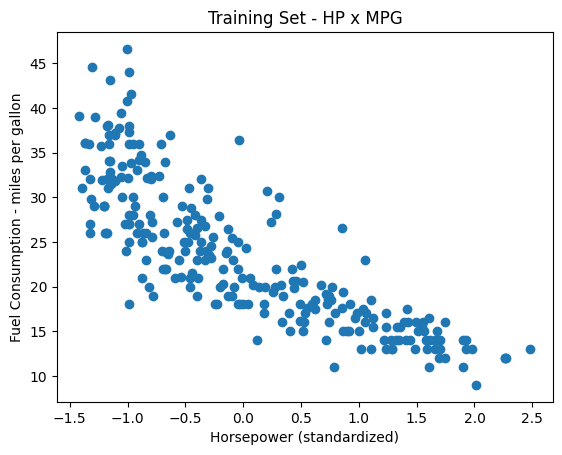

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_single_feature_pt, train_target_pt)
plt.xlabel('Horsepower (standardized)')
plt.ylabel('Fuel Consumption - miles per gallon')
plt.title('Training Set - HP x MPG')


The relationship isn't quite linear, but there's clearly an inverse correlation between a car's power and its fuel consumption, as you'd expect. A small 50 HP car is certainly much more fuel-efficient (hence more miles per gallon) than a high-powered 200 HP sports car.

# Tensor Dataset  
A TensorDataset is just a container that keeps:

your inputs (X) and

your targets (y)

together, row by row.

- Think of it like a zipped folder:  
- They simply wrap a couple of tensors containing your data - feature(s) and target(s) - so you can conveniently load your data in mini-batches at will for training your model.


In [ ]:
(feature, target)
(feature, target)
(feature, target)
...


# Creating a TensorDataset

In [83]:
import torch
from torch.utils.data import TensorDataset

# Index of the 'hp' column in cont_attr
hp_idx = cont_attr.index('hp')

# Convert standardized features to PyTorch tensors
train_single_feature_pt = torch.as_tensor(standardized_data['train'][:, [hp_idx]], dtype=torch.float32)
val_single_feature_pt   = torch.as_tensor(standardized_data['val'][:, [hp_idx]], dtype=torch.float32)
test_single_feature_pt  = torch.as_tensor(standardized_data['test'][:, [hp_idx]], dtype=torch.float32)

# Convert targets to PyTorch tensors
train_target_pt = torch.as_tensor(train[['mpg']].values, dtype=torch.float32)
val_target_pt   = torch.as_tensor(val[['mpg']].values, dtype=torch.float32)
test_target_pt  = torch.as_tensor(test[['mpg']].values, dtype=torch.float32)

# Create TensorDatasets
train_ds = TensorDataset(train_single_feature_pt, train_target_pt)
val_ds   = TensorDataset(val_single_feature_pt, val_target_pt)
test_ds  = TensorDataset(test_single_feature_pt, test_target_pt)

# Quick check: print first 5 elements from training set
print(train_ds[:5])



(tensor([[-8.7263e-05],
        [ 2.8327e-01],
        [ 8.6497e-01],
        [-1.7748e-01],
        [ 3.2359e-01]]), tensor([[18.0000],
        [28.1000],
        [19.4000],
        [20.3000],
        [20.2000]]))


# Mini Batches  
- A **mini-batch** is a small, random subset of a dataset, often with sizes like 32, 64, or 128. Mini-batches let models train efficiently, especially when memory is limited. PyTorch’s DataLoader helps draw these mini-batches from your dataset for training.